**SNAEAKER DATA ANALYSIS USING LINEAR REGRESSION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Test_Nike.csv")

C:\Users\J SONALI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data = df.head(50000)
data

,SKU,SIZE,NAME,SOLD_AT,SOLD_PRICE,CONDITION,SOURCE,GENDER,BRAND,SILHOUETTE,COLORWAY,RETAILPRICE,RELEASEDATE,IS_COLLAB,COLLABORATOR,COLOR,SIZE_VALUE,IS_WIDE,IS_UK,IS_EU
0,DV7186-200,9,Nike Air Force 1 Low '07 LX Amber Brown Phantom,2023-08-02T12:13:28Z,113.0,is_new,stockx,men,Nike,Air Force 1,Amber Brown/Phantom,140.0,2023-07-27,False,None,brown,9.0,False,False,False
1,DV5429-601,11.5,Nike SB Dunk Low Mystic Red Rosewood,2023-08-02T12:13:57Z,157.0,is_new,stockx,men,Nike,Dunk SB,Mystic Red/Emerald Rise-Rugged Orange-Rosewood...,110.0,2023-08-23,False,None,red,11.5,False,False,False
2,FD8777-100,6.5,Nike SB Dunk Low Sandy Bodecker,2023-08-02T12:13:57Z,193.0,is_new,stockx,men,Nike,Dunk SB,White/Hyper Royal/Mean Green,130.0,2022-12-17,False,None,white,6.5,False,False,False
3,921826-101,6.5,Nike Air Max 97 Triple White Wolf Grey (2017/2...,2023-08-02T12:14:00Z,131.0,is_new,stockx,men,Nike,Air Max 97,White/Wolf Grey-Black,160.0,2023-05-01,False,None,white,6.5,False,False,False
4,DD9682-100,9.5,Nike TC 7900 Sail (W),2023-08-02T12:14:00Z,101.0,is_new,stockx,women,Nike,TC 7900,Sail/Black/Sail,120.0,2021-03-03,False,None,white,9.5,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CV3411-600,8W,Nike Air Max 97 LX Sakura Pink,2022-04-03T20:40:10Z,129.0,is_new,stockx,men,Nike,Air Max 97,Pink Blast/White-Black,180.0,NaN,False,None,pink,8.0,False,False,False
49996,BQ6806-100,9,Nike Blazer Mid 77 Vintage White Black,2022-04-03T20:40:23Z,83.0,is_new,stockx,men,Nike,Blazer,Black/Sail-White,100.0,2019-03-25,False,None,white,9.0,False,False,False
49997,DM8329-600,7.5W,Nike Dunk Low Pink Oxford (Women's),2022-04-03T20:40:37Z,180.0,is_new,stockx,women,Nike,Dunk,Pink Oxford/Metallic Silver-White,100.0,2021-08-25,False,None,pink,7.5,False,False,False
49998,315122-111/CW2288-111,9.5,Nike Air Force 1 Low '07 White,2022-04-03T20:40:39Z,113.0,is_new,stockx,men,Nike,Nike Air Force 1 Low '07,White/White,110.0,2007-11-24,False,None,white,9.5,False,False,False


In [4]:
df.isna().sum()

SKU                 0
SIZE             8763
NAME                0
SOLD_AT             1
SOLD_PRICE          1
CONDITION           1
SOURCE              1
GENDER              1
BRAND               1
SILHOUETTE          2
COLORWAY          139
RETAILPRICE         1
RELEASEDATE      7773
IS_COLLAB           1
COLLABORATOR        1
COLOR             139
SIZE_VALUE      12944
IS_WIDE         11381
IS_UK           11381
IS_EU           11381
dtype: int64

In [5]:
data = df.dropna(axis=0)

In [6]:
data.isna().sum()

SKU             0
SIZE            0
NAME            0
SOLD_AT         0
SOLD_PRICE      0
CONDITION       0
SOURCE          0
GENDER          0
BRAND           0
SILHOUETTE      0
COLORWAY        0
RETAILPRICE     0
RELEASEDATE     0
IS_COLLAB       0
COLLABORATOR    0
COLOR           0
SIZE_VALUE      0
IS_WIDE         0
IS_UK           0
IS_EU           0
dtype: int64

In [8]:
#FEATURE IMPORTANCE
le = LabelEncoder()
data_categorical = data[['SKU', 'NAME', 'SOLD_AT', 'CONDITION', 'SOURCE', 'GENDER', 'SILHOUETTE', 'COLORWAY', 'RELEASEDATE', 'IS_COLLAB', 'COLLABORATOR', 'COLOR', 'SIZE_VALUE', 'IS_WIDE', 'IS_UK', 'IS_EU']]

for i in (data_categorical.columns):
    flattened_slice = data_categorical[i].ravel()
    encoded_slice = le.fit_transform(flattened_slice)
    data[f"{i}_ENCODED"] = encoded_slice.reshape(data_categorical[i].shape)

<ipython-input-8-40f80cef70ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{i}_ENCODED"] = encoded_slice.reshape(data_categorical[i].shape)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593490 entries, 0 to 614148
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SKU                   593490 non-null  object 
 1   SIZE                  593490 non-null  object 
 2   NAME                  593490 non-null  object 
 3   SOLD_AT               593490 non-null  object 
 4   SOLD_PRICE            593490 non-null  float64
 5   CONDITION             593490 non-null  object 
 6   SOURCE                593490 non-null  object 
 7   GENDER                593490 non-null  object 
 8   BRAND                 593490 non-null  object 
 9   SILHOUETTE            593490 non-null  object 
 10  COLORWAY              593490 non-null  object 
 11  RETAILPRICE           593490 non-null  float64
 12  RELEASEDATE           593490 non-null  object 
 13  IS_COLLAB             593490 non-null  object 
 14  COLLABORATOR          593490 non-null  object 
 15  

In [10]:
# dropped unwanted data columns in the data after Label encoding
data.drop(data.columns[[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]  , axis = 1, inplace = True)

C:\Users\J SONALI\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593490 entries, 0 to 614148
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SOLD_PRICE            593490 non-null  float64
 1   SKU_ENCODED           593490 non-null  int32  
 2   NAME_ENCODED          593490 non-null  int32  
 3   SOLD_AT_ENCODED       593490 non-null  int32  
 4   CONDITION_ENCODED     593490 non-null  int32  
 5   SOURCE_ENCODED        593490 non-null  int32  
 6   GENDER_ENCODED        593490 non-null  int32  
 7   SILHOUETTE_ENCODED    593490 non-null  int32  
 8   COLORWAY_ENCODED      593490 non-null  int32  
 9   RELEASEDATE_ENCODED   593490 non-null  int32  
 10  IS_COLLAB_ENCODED     593490 non-null  int32  
 11  COLLABORATOR_ENCODED  593490 non-null  int32  
 12  COLOR_ENCODED         593490 non-null  int32  
 13  SIZE_VALUE_ENCODED    593490 non-null  int64  
 14  IS_WIDE_ENCODED       593490 non-null  int32  
 15  

In [12]:
column_names = {
    'SKU_ENCODED': 'SKU',
    'NAME_ENCODED': 'NAME',
    'SOLD_AT_ENCODED': "SOLD_AT",
    'CONDITION_ENCODED': 'CONDITION',
    'SOURCE_ENCODED': 'SOURCE',
    'GENDER_ENCODED': 'GENDER',
    'SILHOUETTE_ENCODED': 'SILHOUETTE',
    'COLORWAY_ENCODED': 'COLORWAY',
    'RELEASEDATE_ENCODED': 'RELEASEDATE',
    'IS_COLLAB_ENCODED': 'IS_COLLAB',
    'COLLABORATOR_ENCODED': 'COLLABORATOR',
    'COLOR_ENCODED': 'COLOR',
    'SIZE_VALUE_ENCODED': 'SIZE_VALUE',
    'IS_WIDE_ENCODED': 'IS_WIDE',
    'IS_UK_ENCODED': 'IS_UK',
    'IS_EU_ENCODED': 'IS_EU'
}

data = data.rename(columns=column_names)

In [13]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593490 entries, 0 to 614148
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SOLD_PRICE    593490 non-null  float64
 1   SKU           593490 non-null  int32  
 2   NAME          593490 non-null  int32  
 3   SOLD_AT       593490 non-null  int32  
 4   CONDITION     593490 non-null  int32  
 5   SOURCE        593490 non-null  int32  
 6   GENDER        593490 non-null  int32  
 7   SILHOUETTE    593490 non-null  int32  
 8   COLORWAY      593490 non-null  int32  
 9   RELEASEDATE   593490 non-null  int32  
 10  IS_COLLAB     593490 non-null  int32  
 11  COLLABORATOR  593490 non-null  int32  
 12  COLOR         593490 non-null  int32  
 13  SIZE_VALUE    593490 non-null  int64  
 14  IS_WIDE       593490 non-null  int32  
 15  IS_UK         593490 non-null  int32  
 16  IS_EU         593490 non-null  int32  
dtypes: float64(1), int32(15), int64(1)
memory usage:

In [19]:
features = ['SKU', 'NAME', 'SOLD_AT', 'CONDITION', 'SOURCE', 'GENDER', 'SILHOUETTE', 'COLORWAY', 'RELEASEDATE', 'IS_COLLAB', 'COLLABORATOR', 'COLOR', 'SIZE_VALUE']
x = data[features]
y = data['SOLD_PRICE']

In [62]:
model = RandomForestRegressor(n_estimators=20, random_state=42)
model.fit(x, y)

RandomForestRegressor(n_estimators=20, random_state=42)

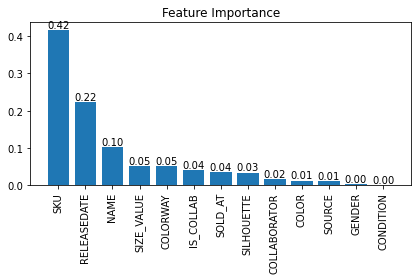

In [51]:
importances = model.feature_importances_
sorted_index = np.argsort(importances)[::-1]
plt.title('Feature Importance')
bars = plt.bar(range(x.shape[1]), importances[sorted_index], align='center')
plt.xticks(range(x.shape[1]), x.columns[sorted_index], rotation=90)
for idx, val in enumerate(importances[sorted_index]):
    plt.text(idx, val, f'{val:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [67]:
#correlation analysis
encoded_data = pd.concat([x, y], axis=1)
correlation = encoded_data.corr()
print(correlation)

                   SKU      NAME   SOLD_AT  CONDITION    SOURCE    GENDER  \
SKU           1.000000  0.167112  0.417779  -0.054541 -0.156945  0.063089   
NAME          0.167112  1.000000  0.135151  -0.011639 -0.018063  0.030642   
SOLD_AT       0.417779  0.135151  1.000000  -0.217797 -0.370258  0.022426   
CONDITION    -0.054541 -0.011639 -0.217797   1.000000  0.469007 -0.002500   
SOURCE       -0.156945 -0.018063 -0.370258   0.469007  1.000000 -0.059867   
GENDER        0.063089  0.030642  0.022426  -0.002500 -0.059867  1.000000   
SILHOUETTE   -0.089357  0.652241  0.033751  -0.046880 -0.023624  0.003111   
COLORWAY      0.067081 -0.064061  0.039647   0.040103  0.002024  0.117122   
RELEASEDATE   0.864134  0.243498  0.480537  -0.078094 -0.179196  0.052032   
IS_COLLAB     0.040982 -0.013941 -0.073886   0.030374  0.035107 -0.139321   
COLLABORATOR  0.019738  0.009034 -0.093472   0.031157  0.049193 -0.118742   
COLOR        -0.014960 -0.057080  0.001028   0.037933  0.016240  0.108382   

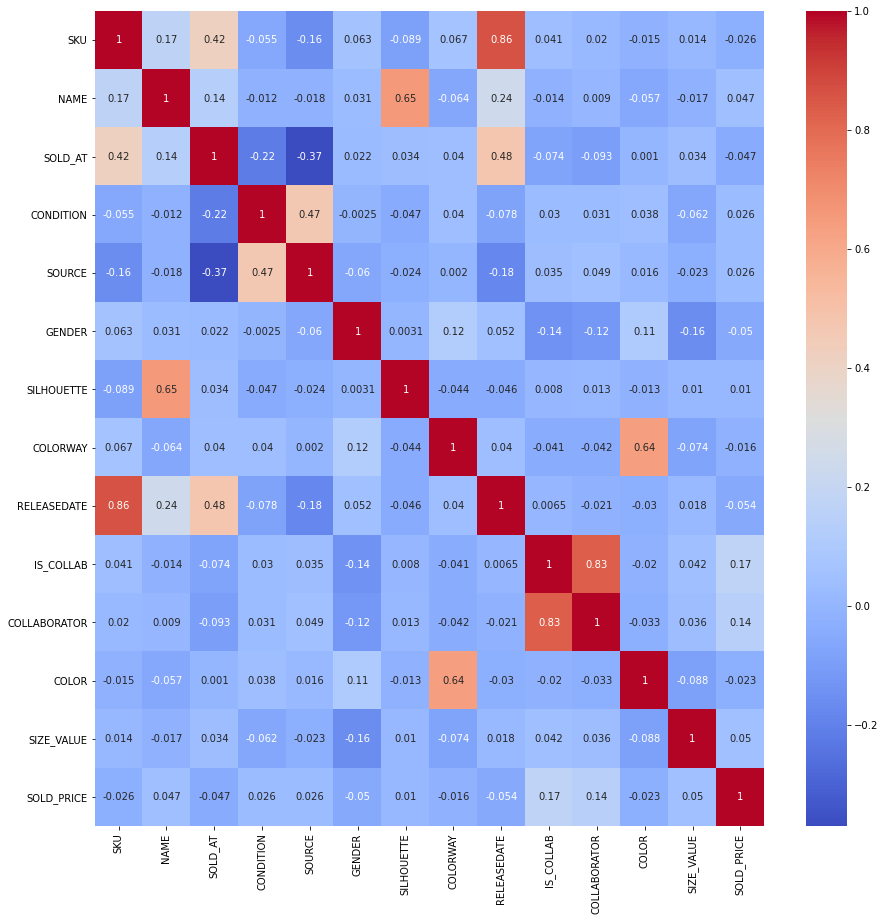

In [23]:
#PLOTTING HEAT MAP
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
# APPLYING LINEAR REGRESSION ALGORITHM
import statsmodels.api as sm

In [68]:

y = data['SOLD_PRICE']
X = data[['SKU', 'NAME', 'CONDITION', 'SOURCE', 'GENDER', 'SILHOUETTE']]

# Add a constant to the independent variables matrix
X = sm.add_constant(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data set: {mse}')
print(model.summary())

Mean Squared Error on Test Data set: 139389.12101456046
                            OLS Regression Results                            
Dep. Variable:             SOLD_PRICE   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     684.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:28:18   Log-Likelihood:            -3.3921e+06
No. Observations:              474792   AIC:                         6.784e+06
Df Residuals:                  474785   BIC:                         6.784e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [60]:
test_pred = pd.DataFrame(data = {"Train Prediction" :y_pred, 'actuals' : y_test})
results = test_pred.head(100)
results

,Train Prediction,actuals
409313,124.741064,135.0
257447,170.437028,205.0
215279,170.691582,901.0
172339,221.370656,857.0
487365,150.302455,295.0
...,...,...
212723,191.177489,150.0
17945,221.093719,201.0
441055,156.127000,96.0
464021,200.919289,124.0


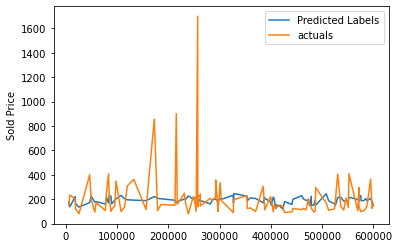

In [69]:
# ACTUAL AND PREDICTED LABELS
sns.lineplot(x=results.index, y='Train Prediction', data=results, label='Predicted Labels', )
sns.lineplot(x=results.index, y='actuals', data=results, label='actuals')
plt.ylabel("Sold Price")
plt.legend()
plt.show()